In [1]:

'''
https://medium.com/@nabanita.sarkar/simulating-amplitude-modulation-using-python-6ed03eb4e712#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjM4ZjM4ODM0NjhmYzY1OWFiYjQ0NzVmMzYzMTNkMjI1ODVjMmQ3Y2EiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTM2MTY0NzIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzQ0Mzg1MzQyMjE3OTA2NTYyNyIsImVtYWlsIjoiZ3Vpc2h1eXVueWVAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiLmooHogIDmlociLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2hUQTlxTU5LNVVFVUR1ZFVUWmtNdkFQcm9FOGxSR3pLY21fQlJOPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IuiAgOaWhyIsImZhbWlseV9uYW1lIjoi5qKBIiwiaWF0IjoxNjUzNjE2NzcyLCJleHAiOjE2NTM2MjAzNzIsImp0aSI6IjVjZjkzMDQ4OGE5YTQ3MGQ0YjI3ZGRiODE1NDY0NTdkMTRlZWEzNzUifQ.HNLk9wD_csuoGvpjFSH14Ig4JopgV1HgITAXc0CZLzuTNHjUikQo83SkScjqSzunPYe1hEIPLtxdP35X71ZvLUCnn_0OHWo8mxtr5uTEDnoBhIVwWC2tBD_YzthozAKTs_B1KpzKw_cljQxZMO2Mqrjo5qtvu6nFRtKfW7FHNZD8Bv8IGO65RGor26NWhadDv9Fzs5GtIyL8_ljil2glk0WB2B2PjqiVwdpC3_zs3yXh5w7RhdEVLr3IaY1uWEgi_gZeM86esZNlj0L_TOZ3F9QoY3IJFVRhmm6Z-_O2yOimRw7cd77CRIBxBw9IX4qG3CBrAdIzOReul5y9tZ8uQA

'''
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import sounddevice as sd
import time
import sounddevice as sd

In [5]:

#Carrier wave c(t)=A_c*cos(2*pi*f_c*t)
#Modulating wave m(t)=A_m*cos(2*pi*f_m*t)
#Modulated wave s(t)=A_c[1+mu*cos(2*pi*f_m*t)]cos(2*pi*f_c*t)

# A_c = float(input('Enter carrier amplitude: '))
# f_c = float(input('Enter carrier frquency: '))
# A_m = float(input('Enter message amplitude: '))
# f_m = float(input('Enter message frquency: '))
# modulation_index = float(input('Enter modulation index: '))


In [9]:
A_c = 10000
f_c = 1000
A_m = 10000
f_m = 10
# 应该是深度，大于1就变成过度调频了。
modulation_index = 1

duration = 1
samplerate = 1000
Num_t = duration * samplerate
t = np.linspace(0, duration, Num_t)

Text(0.5, 0, 'Carrier signal')

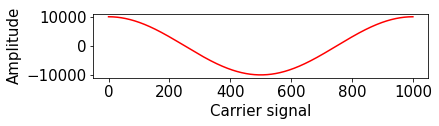

In [15]:
fc = 1000
carrier = A_c*np.cos(2*np.pi*f_c*t)

plt.subplot(3,1,2)
plt.plot(carrier, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')


In [ ]:
modulator = A_m*np.cos(2*np.pi*f_m*t)
product = A_c*(1+modulation_index*np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t)


plt.subplot(3,1,1)
plt.title('Amplitude Modulation')
plt.plot(modulator,'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')

plt.subplot(3,1,3)
plt.plot(product, color="purple")
plt.ylabel('Amplitude')
plt.xlabel('AM signal')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)

fig.savefig('Amplitude Modulation.png', dpi=100)


In [5]:
data = product
write("example.wav", samplerate, data.astype(np.int16))

In [12]:
sd.play(data, samplerate)
time.sleep(100)
sd.stop()